In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
sys.path.append(str(Path.cwd() / 'util/'))

from qubit_templates import *
from functions import *
from ChipDesign import *

# Read configuration file

In [3]:
JJtype = "manhattan" # manhattan or dolan

common_config = load_config( f"config/common.yaml" )
config = load_config( f"config/{JJtype}_2D_silicon.yaml" )
config = {**common_config, **config} # common config will be overwritten by value in the right 

SimulationDesign = True # Make inverted design for HFSS simulation (This takes a long time...)
QiskitDesign = True

outname = "ICEPP_mino_2D" + JJtype
if config["JJ_bandage"]:
    outname += "bd"
if config["DCLine_activate"]:
    outname += "_dcline"
if config["JJ_entangle"]:
    outname += "_entangle"    


# Wafer design

In [4]:
wafer = device_Wafer(config)

# Place chip designs

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


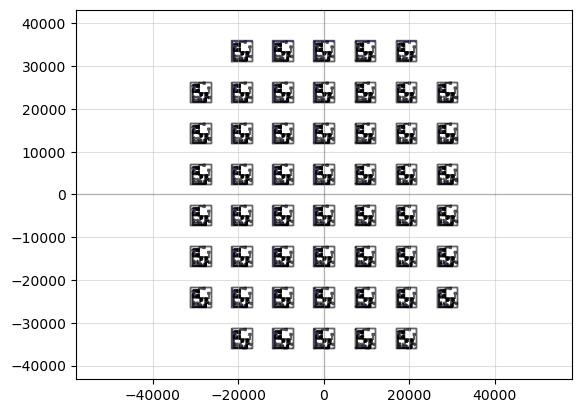

In [5]:
D = sweep_chipdesign( config )
D.center = (0,0)

## Remove corners
Grid_width = config["Grid_sweep_array"][0]["x"]
Grid_height = config["Grid_sweep_array"][0]["y"]
for iref, ref in enumerate(D.references[:]):
    if iref == 0 or iref == len(Grid_width)-1 or iref == len(Grid_width) * (len(Grid_height)-1) or iref == len(Grid_width) * len(Grid_height) - 1:
        D.remove(ref)

wafer.add_ref(D)
qp(D)


# Add EB markers

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


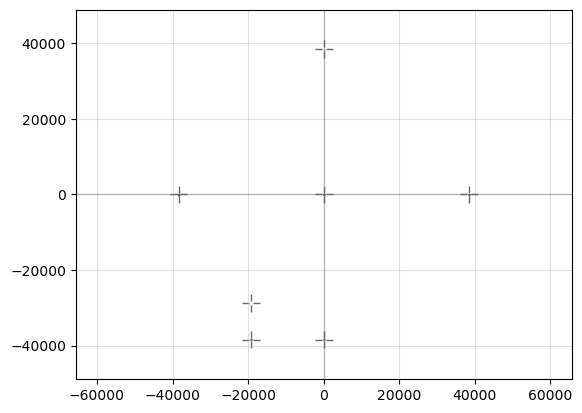

DeviceReference (parent Device "EBmarkers", ports [], origin (0, 0), rotation 0, x_reflection False)

In [6]:
EBmarkers = device_EBmarkers(marker_pos = config["EBMarker_pos"], layer = config["EBMarker_layer"])
qp(EBmarkers)
wafer.add_ref(EBmarkers)


# Add grid lines

13 15


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


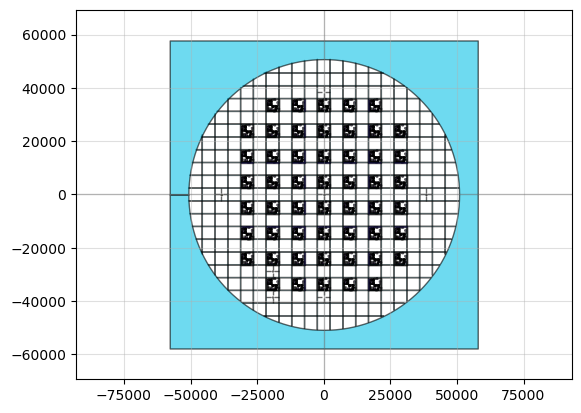

In [7]:
grid = device_Grid(config)
wafer.add_ref( grid )

qp(wafer)


In [8]:
wafer.write_gds('output/' + outname)

'output/ICEPP_mino_2Dmanhattan_dcline_entangle.gds'